<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parzen-Window" data-toc-modified-id="Parzen-Window-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parzen Window</a></span><ul class="toc-item"><li><span><a href="#-From-Scratch-" data-toc-modified-id="-From-Scratch--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span> From Scratch </a></span></li><li><span><a href="#-With-Built-in-Functions" data-toc-modified-id="-With-Built-in-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> With Built-in Functions</a></span></li></ul></li></ul></div>

# Parzen Window

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
url = "https://raw.githubusercontent.com/fardinabbasi/ParzenWindow/main/ted_main.csv"
df=pd.read_csv(url)

duration = df['duration']
duration

0       1164
1        977
2       1286
3       1116
4       1190
        ... 
2545     476
2546     290
2547     651
2548    1100
2549     519
Name: duration, Length: 2550, dtype: int64

<h2> From Scratch </h2>

In [3]:
def ParzenWindow_est(x,x_samples,h):
	k=0
	for xi in x_samples:
		k += norm.pdf((x-xi)/h,loc=0,scale=1)
	p=k/(len(x_samples)*h)
	return p

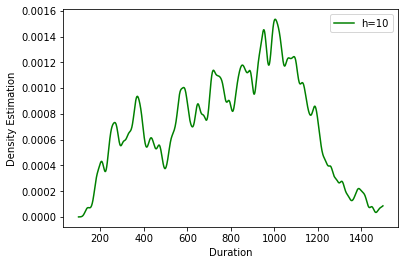

In [4]:
x=np.array(range(100,1500,1))

plt.figure()
plt.plot(x,ParzenWindow_est(x,duration,10),color='g',label='h=10')
plt.xlabel('Duration')
plt.ylabel('Density Estimation')
plt.legend()
plt.show()

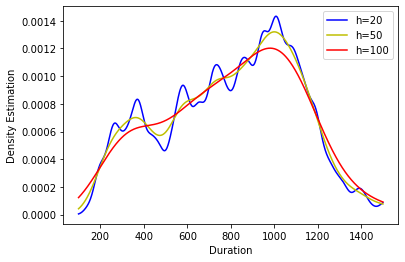

In [5]:
plt.figure()
plt.plot(x,ParzenWindow_est(x,duration,20),color='b',label='h=20')
plt.plot(x,ParzenWindow_est(x,duration,50),color='y',label='h=50')
plt.plot(x,ParzenWindow_est(x,duration,100),color='r',label='h=100')
plt.legend()
plt.xlabel('Duration')
plt.ylabel('Density Estimation')
plt.show()

<h2> With Built-in Functions

In [6]:
from sklearn.neighbors import KernelDensity

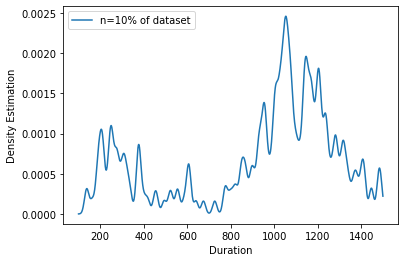

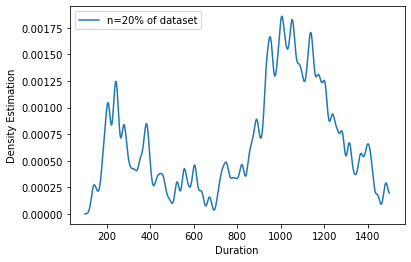

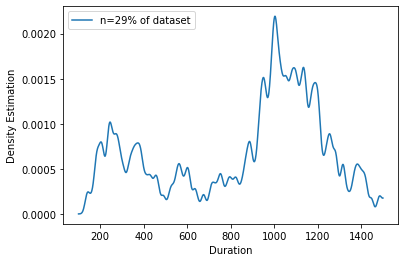

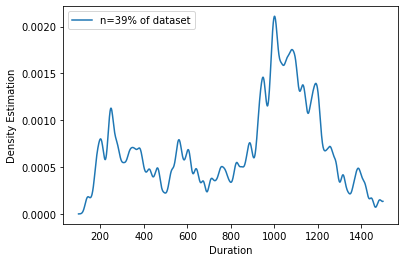

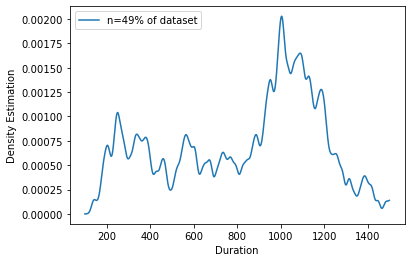

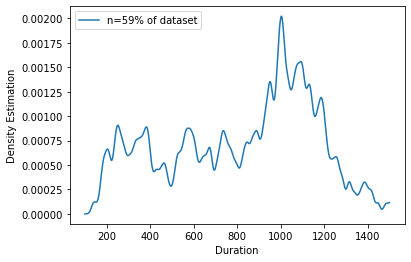

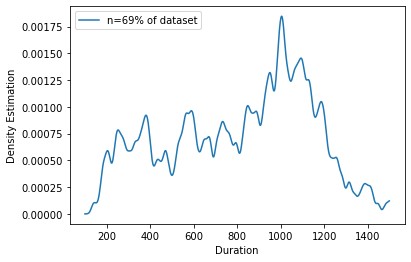

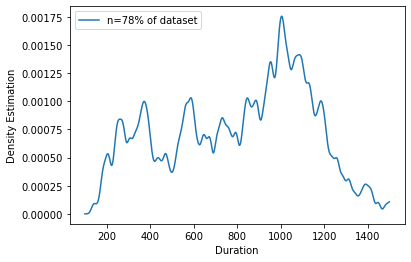

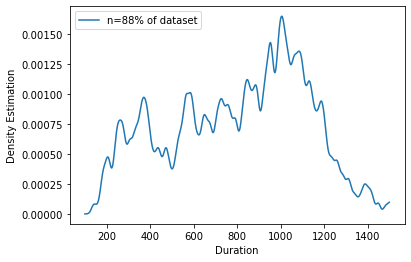

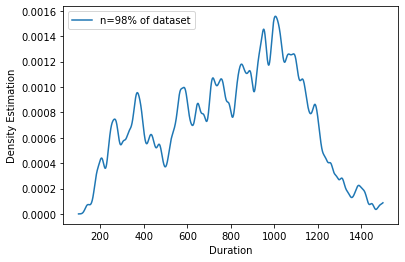

In [8]:
x=np.array(range(100,1500,1))

for n in range(250,len(duration),250):
	kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(duration[:n].values.reshape(-1,1))
	log_likelihood=kde.score_samples(x.reshape(-1,1))
	p=np.exp(log_likelihood)
	plt.figure()
	plt.plot(x,p,label='n='+str(round(n*100/len(duration)))+'% of dataset')
	plt.legend()
	plt.xlabel('Duration')
	plt.ylabel('Density Estimation')
	plt.show()